In [1]:
__author__ = 'Shalmali Kulkarni '
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
from scipy import stats
from sklearn import svm
import pylab
import math

## Task 1: (5+5+5+5+5=25 pts)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 

a. Report the separating hyperplane (line).
 
b. Calculate the upper and lower hyperplanes (lines) of the margin.

c. Compute the width of the margin.
 
d. List the support vectors.

e. What would happen to the margin if you instead made the constant C very small?


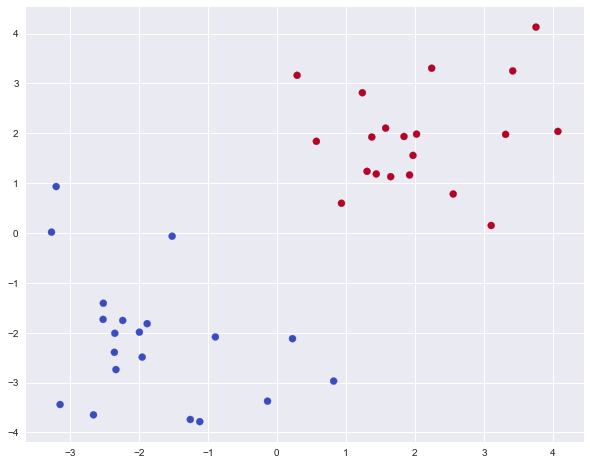

In [2]:
#Data
data1=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))

## a. Report the separating hyperplane (line).

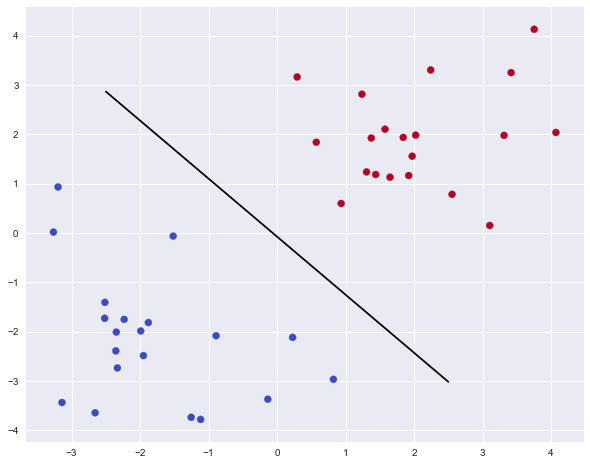

In [3]:

# fit the model
clf = svm.SVC(kernel='linear',C=100000)  
clf.fit(X, Y)
# get the separating hyperplane
w = clf.coef_[0]

a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

## plot the hyperplane. 
plt.plot(x1, x2, 'k-')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))

#### Figure 1: Hyperplane dividing the dataset into two classes. 

## b. Calculate the upper and lower hyperplanes (lines) of the margin.

In [4]:
b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

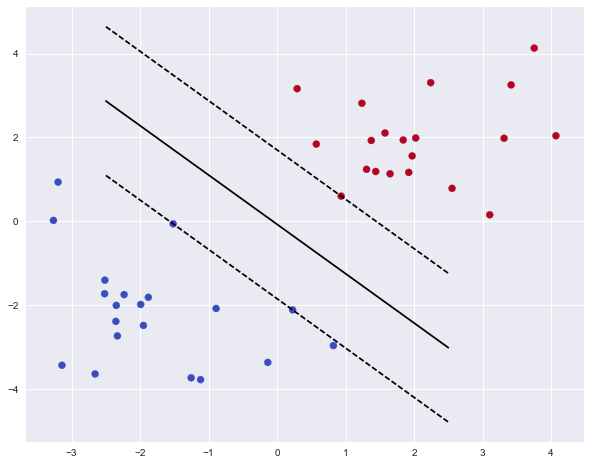

In [5]:
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))

#### Figure 2a: Hyperplane and the nearest vectors to the plane

(-4, 3)

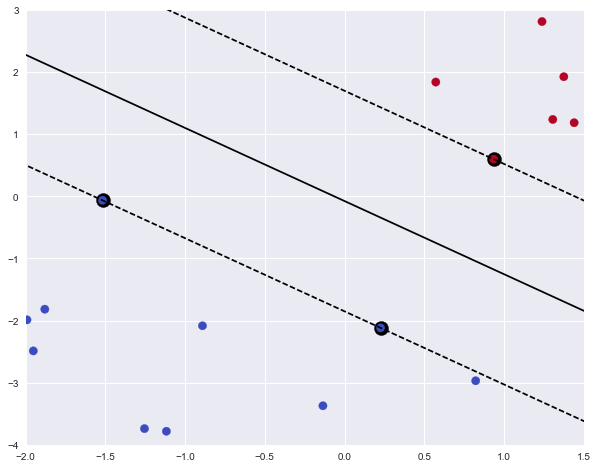

In [6]:
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='k')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=70, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.xlim(-2,1.5)
plt.ylim(-4,3)

#### Figure 2b: Hyperplane and the nearest vectors to the plane (zoomed in)

## c. Compute the width of the margin.

In [7]:
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print 'The width of the margin is:', margin
print 'The total width of the margin is ', 2*margin

The width of the margin is: 1.14889967521
The total width of the margin is  2.29779935043


## d. List the support vectors.

In [8]:
print 'The support vectors are :\n', clf.support_vectors_

The support vectors are :
[[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]
 [ 0.93564585  0.5969359 ]]


## e. What would happen to the margin if you instead made the constant C very small?

A large value of C basically tells our model that we do not have that much faith in our data’s distribution, and will only consider points close to line of separation.
A small value of C includes more/all the observations, allowing the margins to be calculated using all the data in the area. A lower C is taken to demostrate the margins below:


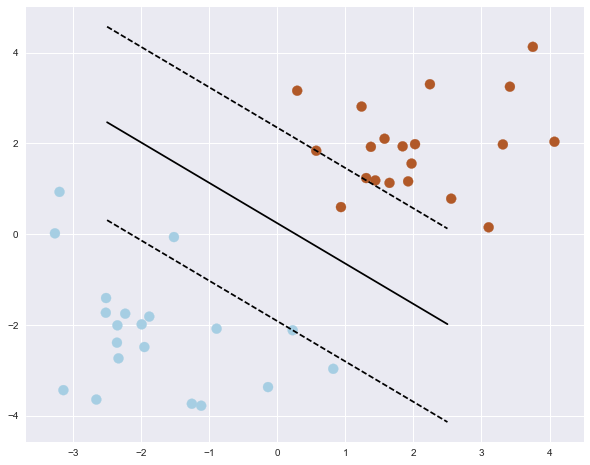

In [9]:
from sklearn import svm
# fit the model
clf = svm.SVC(kernel='linear',C=0.1)  # as we use linear svm we specify a linear kernel (see below what does it mean)
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
########################################################################
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that go through the
# support vectors
b = clf.support_vectors_[0]

x2_down = a * x1 + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y, cmap=plt.cm.Paired,s=100)

plt.axis('tight')
plt.show()

In [10]:
# calculating the margin
M = 1/ ((w[0] ** 2 + w[1] ** 2) ** 0.5)
print "The length of margin is ", M
print "The total length of margin on both the sides(up and down) is ", 2*M

The length of margin is  1.61157874672
The total length of margin on both the sides(up and down) is  3.22315749344


As seen above there is a difference in margins calculated using a very large C and low C. A large value of C gives us a better hyperplan and margin.

## Task 2 (5+5+5+5=20 pts)

#### (1) Train polynomial SVM over the training subset of the dataset provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


/Users/shalmali/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


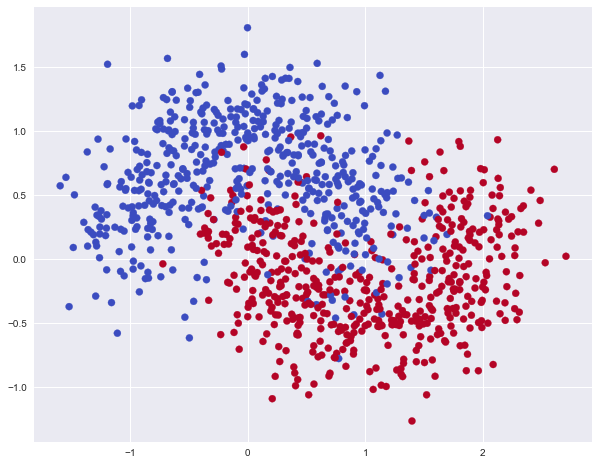

In [11]:
#Data 
data3=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

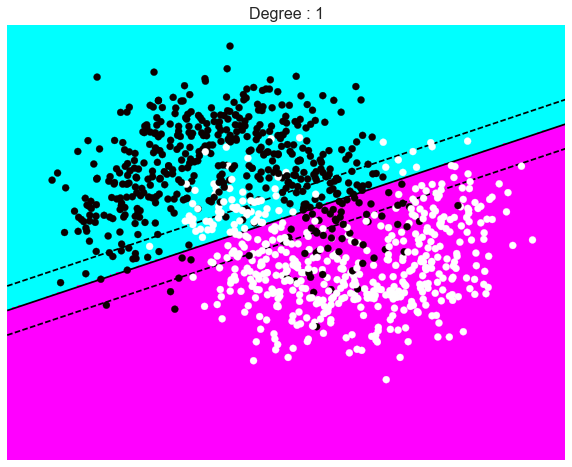

we successfully predict(IS) the 83 percent of data


/Users/shalmali/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


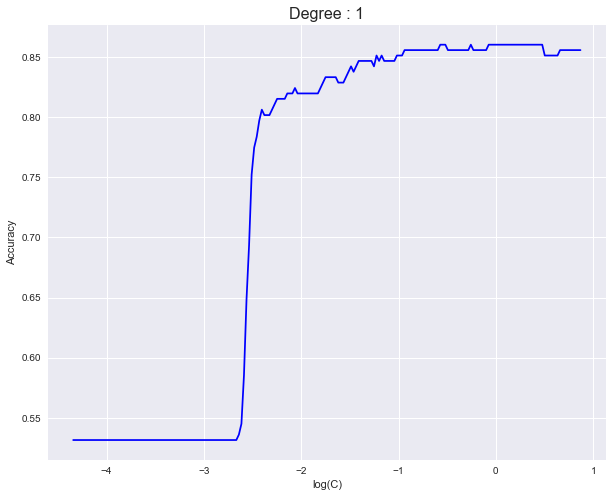

The optimal C we found is:1.45042888649 w.r.t. max accuracy :0.86036036036


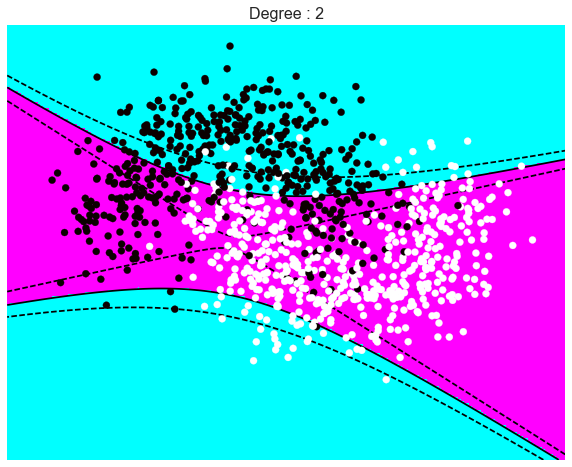

we successfully predict(IS) the 72 percent of data


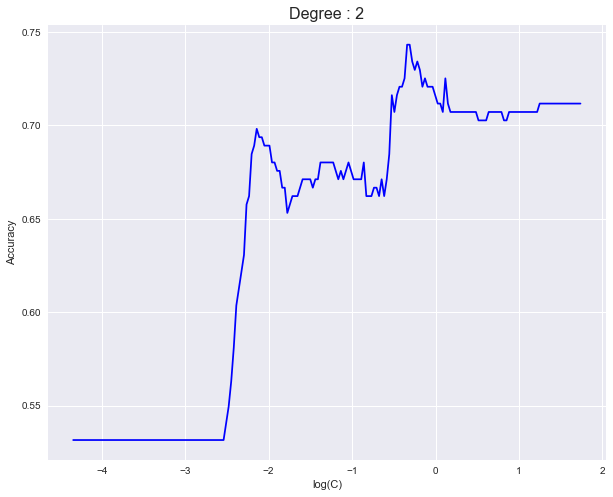

The optimal C we found is:0.489893215491 w.r.t. max accuracy :0.743243243243


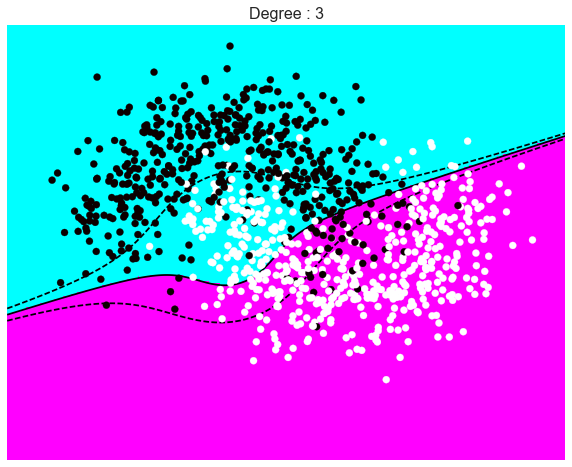

we successfully predict(IS) the 81 percent of data


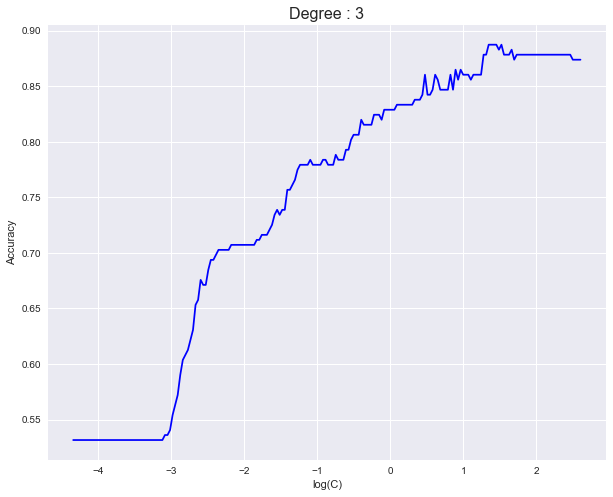

The optimal C we found is:26.2149971758 w.r.t. max accuracy :0.887387387387


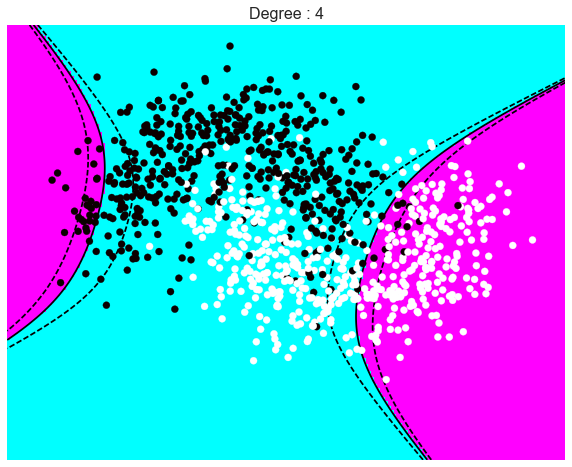

we successfully predict(IS) the 67 percent of data


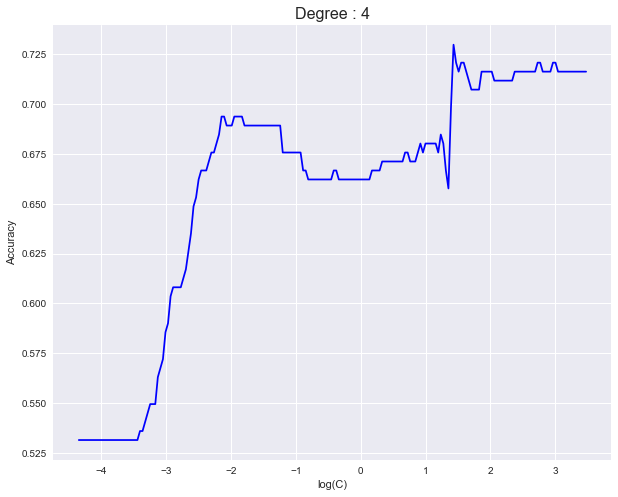

The optimal C we found is:27.0174353706 w.r.t. max accuracy :0.72972972973


In [12]:
#fig = plt.figure(figsize=(20,10)) 


#Let's use polynomial kernal with degree = 1,2,3,4
for i in range(1,5):
    degree = i
    clf = svm.SVC(kernel='poly',degree=degree) 
    clf.fit(X_train, Y_train)
    # plot the line, the points, and the nearest vectors to the plane
    #ax1, ax2 = fig.add_subplot(220+a), fig.add_subplot(221+a)
    
    plt.clf()
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, zorder=10, cmap=plt.cm.hot)
    plt.axis('tight')
    x_min = -2
    x_max = 3
    y_min = -2
    y_max = 2

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)

    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.cool)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.title('Degree : %d'%(degree), fontsize = 16)
    plt.show()
    
    print("we successfully predict(IS) the {} percent of data".format((Y_train==clf.predict(X_train)).sum()\
                                                                      *100/len(Y_train)))
    # Let's do cross validation for choosing C since we see the result is not really good.
    # Let's devide the training set into training set and validation set.
    X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=1000)
    #When C is very small, which means we want to tolerate more mistakes. If C is very big, which 
    #means we do not tolerate much mistakes - getting rid of any single mistake then is worth 
    #more than making the margin high
    C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',C=c, degree=degree) 
        clf.fit(X_train_1, Y_train_1)
        right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) #OS score for validation set
        OS_validation.append(right)
    
    temp=pd.DataFrame([C,OS_validation]).T #put results together.
    ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # Select the middle point 
    C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

    C=[math.log(y,10) for y in C]# for a better graph
    
    plt.plot(C,OS_validation,'b',)
    plt.legend(loc='upper right')
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.title('Degree : %d'%(degree), fontsize = 16)
    plt.show()
    
    print("The optimal C we found is:{} w.r.t. max accuracy :{}".format(C_opt,temp.iloc[:,1].max())) 
# we choose the biggest one to stay on the safe side


#### Figure 3: Support Vector classification and the accuracy vs log(C) graphs for degrees 1,2,3 and 4. 

The maximum classification accuracy of 88% is acheived for 3rd degress polynomial. Therefore that is selected. 

In [13]:
C_opt = 26.214997158 
clf = svm.SVC(kernel='poly',C=C_opt, degree=3)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by using polynomial kernel".format((correct)*100)

we successfully(OS) predict the 89.0909090909 percent of data by using polynomial kernel


In [14]:
OS_validation=[]
for i in range(1,5):
    C=[math.exp(i) for i in np.linspace(-10,2*i,200)] 
    for c in C:
        clf = svm.SVC(kernel='poly',C=c, degree = i) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS_validation.append(correct)

### Task 3 (5+5=10pts)

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports(1) or SUV(2)), the color of the car (red(1) or yellow(2)), and the origin of the car (domestic(1) or imported(2)). And the labels for the data are: stolen(1) and not(0). 

#### Questions:

a) Calculate the following sample probabilities:
P(Red|Stolen), P(SUV|Stolen), P(Domestic|Stolen), P(Red|Not Stolen) , P(SUV|Not Stolen), and P(Domestic|Not Stolen)

b) Suggest a classification for a red, domestic SUV - whether it will be stolen or not - using Naive Bayes classifier. 

Please perform all the necessary computations "by hands" rather than using python code.

In [15]:
import numpy as np
import pandas as pd
y=[1,0,1,0,1,0,1,0,0,1]
X=[[1,1,1,2,2,2,2,2,1,1],[1,1,1,1,1,2,2,2,2,1],[1,1,1,1,2,2,2,1,2,2]]
data=[y]+X
data=pd.DataFrame(data).T
data.columns=['Stolen?','Color','Type','Origin']

In [16]:
data

,Stolen?,Color,Type,Origin
0,1,1,1,1
1,0,1,1,1
2,1,1,1,1
3,0,2,1,1
4,1,2,1,2
5,0,2,2,2
6,1,2,2,2
7,0,2,2,1
8,0,1,2,2
9,1,1,1,2


Proability of features given the target variable (Stolen or Not Stolen). 
P(A given B) = P(A|B) = P(A∩B)/P(B) 

**Proabilities**

P(Red|Stolen) = 3/5

P(SUV|Stolen) = 1/5

P(Domestic|Stolen) = 2/5

P(Red|Not Stolen) = 2/5

P(SUV|Not Stolen) = 3/5

P(Domestic|Not Stolen) = 3/5

#### Suggest a classification for a red, domestic SUV - whether it will be stolen or not - using Naive Bayes classifier.

P(Stolen|{Red,SUV,Domestic}) = 3/5.0 * 1/5.0 * 2/5.0 * 0.5

P = 0.024 

P(Not Stolen|{Red, SUV,Domestic}) = 2/5.0 * 3/5.0 * 3/5.0 * 0.5

P = 0.072

Considering both the proabilities, the proability of Not Stolen is greater than proability of stolen. 

** red, domestic SUV - Not Stolen**

### Task 4 (10+10=20pts)
Consider a following Guassian Naive Bayes problem.
We use eight factors to predict if people have diabetes or not. The variabls are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)
#### ---------------------------------------------------------------------------------------------------------------------

#### Questions:

a)Train the classifier: use the training data to estimate prior probabilities $P(y=b)$ as well as the parameters (mean and standard deviation) of the sample distributions $P(x_i|y=b)$.

b)Perform the classification for the test sample and compare your result to y_test and report the OS classification accuracy.

In [17]:
data_train=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/dia_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/dia_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

The variable _number of times pregnant_ is considered as a continuous variable in this case. 

In [18]:
def trainNaiveBayes(trainData):
    #training Gausian Naive Bayes Classifier
    tY=trainData.loc[:,trainData.columns[0]]
    ind1=tY==0
    ind2=tY==1
    dp=pd.DataFrame(columns=trainData.columns, index=['mu1','sigma1','mu2','sigma2'])
      #estimate priors
    dp[trainData.columns[0]]['mu1']=1.0*sum(ind1)/len(trainData.index)
    dp[trainData.columns[0]]['mu2']=1.0*sum(ind2)/len(trainData.index)
    #estimate sample distribution paramters for p(xi|y=b)
    for i in trainData.columns[1:]:
        dp.loc['mu1',i]=(trainData[i][ind1]).mean()
        dp.loc['sigma1',i]=(trainData[i][ind1]).std()
        dp.loc['mu2',i]=(trainData[i][ind2]).mean()
        dp.loc['sigma2',i]=(trainData[i][ind2]).std()
    return dp

In [19]:
def classifyNaiveBayes(classData,dp):
    #classifying using trained Gausian Naive Bayes Classifier
    Y=classData.loc[:,classData.columns[0]]*0
    for j in classData.index:
    #start from the priors
        P1=dp[classData.columns[0]]['mu1'];
        P2=dp[classData.columns[0]]['mu2'];
    #multiply by conditional probability densities p(xi|y=b)
        for i in classData.columns[1:]:
            if dp[i]['sigma1']==0: #if sigma can not be defined (sample does not have variance)
                P1=P1*stats.norm.pdf(classData[i][j], loc=dp[i]['mu1'],scale=1) #pick up arbitrary sigma if undefined
            else:
                P1=P1*stats.norm.pdf(classData[i][j], loc=dp[i]['mu1'],scale=dp[i]['sigma1'])
        
            if dp[i]['sigma2']==0: #if sigma can not be defined (sample does not have variance)
                P2=P2*stats.norm.pdf(classData[i][j], loc=dp[i]['mu2'],scale=1) #pick up arbitrary sigma if undefined
            else:
                P2=P2*stats.norm.pdf(classData[i][j], loc=dp[i]['mu2'],scale=dp[i]['sigma2']) 
        Y[j]=int(P2>P1)
 
    return Y

In [20]:
data_train = data_train.iloc[:,1:]

In [21]:
traindata=pd.concat([y_train,X_train],axis=1)
traindata.head()

,y,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
0,0.0,3.0,158.0,64.0,13.0,387.0,31.2,0.295,24.0
1,0.0,0.0,84.0,64.0,22.0,66.0,35.8,0.545,21.0
2,0.0,9.0,120.0,72.0,22.0,56.0,20.8,0.733,48.0
3,0.0,4.0,110.0,76.0,20.0,100.0,28.4,0.118,27.0
4,1.0,2.0,100.0,66.0,20.0,90.0,32.9,0.867,28.0


In [22]:
dp=trainNaiveBayes(traindata)
dp

,y,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
mu1,0.699153,2.69091,111.467,69.2061,27.2,127.006,31.7091,0.468685,28.3939
sigma1,NaN,2.61006,24.6919,11.7133,10.4369,91.4861,6.33761,0.29175,8.53736
mu2,0.300847,4.07042,144.141,74.5634,33.4789,209.211,35.2239,0.639042,35.7887
sigma2,NaN,3.51862,30.6265,13.7993,9.7627,126.921,6.25849,0.439042,10.2635


In [23]:
testdata=pd.concat([y_test,X_test],axis=1)
C=classifyNaiveBayes(testdata,dp)
print "we classified e-mails correctly in {0} percents of cases".format(100.0*sum(C==y_test)/len(y_test)) 

we classified e-mails correctly in 79.1139240506 percents of cases


In [24]:
#classification accuracy (over test set)
100.0*sum(C==data_test.y)/len(C)

79.11392405063292

In [25]:
#also report accuracy of the classifier over the training 
Ct=classifyNaiveBayes(data_train,dp)
100.0*sum(Ct==data_train.y)/len(Ct)

76.27118644067797

### Task 5 (10+15=25 pts)
We have an artificial data set split, while the training set contains both - labeled (Label_train) and unlabeled (Unlabel) data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

#### Questions:

a) Use the labeled part data_train to predict the labels of X_Label_test, and report the classification accuracy.

b) Improve the classification by using the unlabeled data data_Unlabel and the EM algorithm to predict labels of X_Label_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use any packages you prefer). 

In [26]:
data_train=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/EM_train.csv", index_col=0)
y_Label_train=data_train.iloc[:,0] 
X_Label_train=data_train.iloc[:,1:] 

data_test=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/EM_test.csv",index_col=0)
y_Label_test=data_test.iloc[:,0]
X_Label_test=data_test.iloc[:,1:]

data_Unlabel=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/EM_Unlabel.csv",index_col=0)
X_Unlabel=data_Unlabel.iloc[:,0:]

In [27]:
def EM(X_Label,y_Label,X_Unlabel,dp):
    '''
    A Gaussian Mixture Model using Expectation Maximization algorithm
    arguments:
    X_label : labelled data of all the features
    y_label : labels for the classes
    X_Unlabel: features with unlabels data
    '''
    t = 0  
    haslabels=len(y_Label)>0

    while True:
        t = t + 1
        classData=X_Unlabel
    # Now we want to calculate P(y=1|x) and P(y=2|x) for all observations xj. (these are bunch of scalars)
    # we need this to calculate new dp. Basically speaking, for every new iteration we need a new dp.

    #for y=1 and y=2

        p_x_1=[] #unnormalized P(y=1|x)
        p_x_2=[] #unnormalized P(y=2|x)
        cols=dp[0].columns

        for i in classData.index:
            P1=dp[0][cols[0]][1];
            P2=dp[1][cols[0]][1];
            for j in classData.columns:
                P1=P1*dp[0][j][classData[j][i]]
                P2=P2*dp[1][j][classData[j][i]]
            p_x_1.append(P1)
            p_x_2.append(P2)
    
 
        #Rescale p_x_1 and p_x_2:
        summ=np.asarray(p_x_1)+np.asarray(p_x_2)
        p_x_1_s=np.asarray(p_x_1)/summ
        p_x_2_s=np.asarray(p_x_2)/summ
        inds_1 = np.where(np.isnan(p_x_1_s))
        inds_2 = np.where(np.isnan(p_x_2_s))
        p_x_1_s[inds_1]=0.5
        p_x_2_s[inds_2]=0.5
        #Now let's calculate P(y=1) and P(y=2)
        p_1=p_x_1_s.sum()/len(p_x_1_s)
        p_2=p_x_2_s.sum()/len(p_x_2_s)


        #Now let's calculate the probability distribution of P(xi|y=1) and P(xi|y=2)
    
        m=max([classData[j][i] for j in classData.columns for i in classData.index]) 
        #maximal number of classes in each feature of a training set
        #create output data structure for the probabilities - new iteration
    
        dp1=[pd.DataFrame(columns=cols, index=range(1,m+1)), pd.DataFrame(columns=cols, index=range(1,m+1))]

        #P(y=b)  
        dp1[0][cols[0]][1]=p_1
        dp1[1][cols[0]][1]=p_2


    #estimate conditional probabilities P(x|y=b) -do we add labeled data to fit?

        temp=np.concatenate((np.asmatrix(X_Unlabel),np.asarray(pd.DataFrame(p_x_1_s)),\
                             np.asarray(pd.DataFrame(p_x_2_s))),axis=1)
        temp=pd.DataFrame(temp)
        if haslabels:
            temp_l=np.concatenate((np.asmatrix(X_Label),np.asmatrix(1*(y_Label==0)).transpose(),\
                                   np.asmatrix(1*(y_Label==1)).transpose()),axis=1)
            temp_l=pd.DataFrame(temp_l)
            pd.concat([temp,temp_l])
   
        for j in range(1,len(dp[0].T)):
            for i in range(len(dp[0])):

                dp1[0].iloc[i,j]=temp[temp.iloc[:,j-1]==i+1].iloc[:,-2].sum()/temp.iloc[:,-2].sum()
                dp1[1].iloc[i,j]=temp[temp.iloc[:,j-1]==i+1].iloc[:,-1].sum()/temp.iloc[:,-1].sum()
 
        ############################################################################################
        # Now we use dp to decide whether to continue our iterations
        if (((dp1[0]-dp[0])**2).sum()).sum()+(((dp1[1]-dp[1])**2).sum()).sum()<0.001: #if dp does not change much
            break
        else: 
            dp=dp1  #save new dp and perform next iteration

        
    ###############################################################################################
        #Calculate the log-likelihood
        
        L=0
        
        for i in classData.index:
            P1=dp[0][cols[0]][1];
            P2=dp[1][cols[0]][1];
            for j in classData.columns:
                P1=P1*dp[0][j][classData[j][i]]
                P2=P2*dp[1][j][classData[j][i]]
            temp=math.log(P1+P2)
            L=L+temp
        if haslabels:    
            for i in X_Label.index:
                yi=y_Label[i]
                P=dp[yi][cols[0]][1];
            for j in X_Label.columns:
                P=P*dp[yi][j][X_Label[j][i]]
            L=L+math.log(P)
        
        print "Iteration {0}: log maximum liklihood = {1}".format(t,L)    
    
    return dp

In [28]:
def trainNaiveBayesDiscrete(trainData):
    '''
    A funtion to train Naive Bayes for Discrete variable data
    '''
      #training discrete Naive Bayes Classifier
    tY=trainData.loc[:,trainData.columns[0]]
    m=max([trainData[j][i] for j in trainData.columns[1:] for i in trainData.index]) #maximal number of classes in each feature of a training set
      #create output data structure for the probabilities - same column labels, rows correspond to values of x and there are two arrays like that for different b
    dp=[pd.DataFrame(columns=trainData.columns, index=range(1,m+1)), \
        pd.DataFrame(columns=trainData.columns, index=range(1,m+1))]
      #split the training data between two labels
    ind1=tY==0
    ind2=tY==1
    #estimate P(y=b)  
    dp[0][trainData.columns[0]][1]=1.0*ind1.sum()/len(trainData.index)
    dp[1][trainData.columns[0]][1]=1.0*ind2.sum()/len(trainData.index)
      #estimate conditional probabilities P(x|y=b)
    for j in trainData.columns[1:]:
        for i in range(1,m+1):
            dp[0].loc[i,j]=1.0*(trainData[j][ind1]==i).sum()/ind1.sum();
            
            dp[1].loc[i,j]=1.0*(trainData[j][ind2]==i).sum()/ind2.sum();
            
    return dp

In [29]:
def classifyNaiveBayesDiscrete(classData,dp):
    '''
    A function to classify Discrete labelled data using Naive Bayes 
    '''
    #classifying using trained discrete Naive Bayes Classifier
    Y=classData[classData.columns[0]]*0 #initialize the empty array 
    for i in classData.index: #for al records to classify
    #start with the priors
        P1=dp[0][classData.columns[0]][1]; 
        P2=dp[1][classData.columns[0]][1];
    #and multiply them by the corresponding conditional probabilities P(x_i|y=b)
        for j in classData.columns[1:]:
            P1=P1*dp[0][j][classData[j][i]]
            P2=P2*dp[1][j][classData[j][i]]
        Y[i]=int(P2>P1) #finally for each record decide which P(y|x) is higher and choose the label
    return Y

In [30]:
dp=trainNaiveBayesDiscrete(data_train)

In [31]:
dp

[          y    0    1    2
 1  0.555556    0  0.2    0
 2       NaN  0.2    0  0.2
 3       NaN  0.2    0    0
 4       NaN  0.2  0.2  0.2
 5       NaN    0    0    0
 6       NaN  0.4  0.6  0.6,           y     0     1     2
 1  0.444444   0.5  0.25  0.25
 2       NaN  0.25   0.5   0.5
 3       NaN     0  0.25     0
 4       NaN     0     0     0
 5       NaN  0.25     0     0
 6       NaN     0     0  0.25]

In [32]:
#perform EM estimation for theta
dpEM = EM(X_Label_train,y_Label_train,X_Unlabel,dp)
#OS test
C=classifyNaiveBayesDiscrete(data_test,dpEM) #classify test data with a new theta given by EM
acc=100.0*sum(C==y_Label_test)/len(y_Label_test)
print "After EM we correctly classified {0} percents of the trips".format(acc)

/Users/shalmali/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in divide
/Users/shalmali/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in divide


Iteration 1: log maximum liklihood = -548.405668739
Iteration 2: log maximum liklihood = -531.598986356
Iteration 3: log maximum liklihood = -518.555756513
Iteration 4: log maximum liklihood = -515.404322764
Iteration 5: log maximum liklihood = -514.365252158
After EM we correctly classified 94.4444444444 percents of the trips
